In [1]:
import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim

In [2]:
df = pd.read_csv("data/original_data.csv")

In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0, stratify=df['genre'])
df_train

,id,movie_name,synopsis,genre
39841,8315,Tommy Atkins,A cleric enlists on learning he loves his brot...,action
22314,4958,Hostage,"When a family is held hostage, former hostage ...",action
33001,21828,Eternity Island,Details kept under wrap.,crime
6291,66791,69 Reality in Us,"A Twisted triangle love, where a man feels the...",romance
1256,26554,"Goodnight, Sweetheart",A journalist attacks the campaign of a mayoral...,crime
...,...,...,...,...
7115,11151,Mr. Moon,"Mr. Dennis Hope, the man who actually owns the...",adventure
49426,65700,Ben & Arthur,A pair of recently married gay men are threate...,romance
50639,49827,Death Club,"After five friends break into a shut down, aba...",horror
45494,85181,O Homem dos Olhos Tortos,A gang of criminals is persecuted by two detec...,thriller


In [4]:
#all the preprocessing for the training
df_train, x_train = functions.preprocessing(df=df_train, remove_useless_sentences = True, is_train = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)
y_train = functions.target_variable(df_train, 'genre')
print(y_train)
print(x_train[1])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[0 0 2 ... 5 9 1]
['family', 'held', 'hostage', 'hostage', 'negotiator', 'jeff', 'talley', 'arrives', 'scene', 'talley', 'family', 'kidnapped', 'talley', 'decide', 'important', 'saving', 'family', 'doesn', 'know', 'saving', 'family']


In [5]:
#all the possible preprocessing for the training
df_test, x_test = functions.preprocessing(df=df_test, remove_useless_sentences = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)
y_test = functions.target_variable(df_test, 'genre')
x_test[1]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['tara',
 'love',
 'krishna',
 'college',
 'friend',
 'doe',
 'reciprocate',
 'feeling',
 'thing',
 'turn',
 'krishna',
 'fall',
 'love',
 'lizy']

In [6]:
def gensim_cleaner_ALT(original_docs, dictionary_creation=False, dictionary={}):
    import csv
    from nltk.tokenize import RegexpTokenizer
    from nltk.stem.wordnet import WordNetLemmatizer
    from gensim.models import Phrases
    from spacy.lang.en.stop_words import STOP_WORDS
    import nltk
    import gensim
    
    # Tokenize the documents.
    docs = []

    # Split the documents into tokens.
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(original_docs)):
        docs.append(original_docs[idx].lower())  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]
    # Lemmatize the documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

    # Compute bigrams.
    # Add bigrams to docs (only ones that appear 20 times or more).
    bigram = Phrases(docs, min_count=20)
    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                docs[idx].append(token)

    ## Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

    ## Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]

    ## Remove standard stopwords (SPACY)
    docs = [[token for token in doc if token not in list(STOP_WORDS)] for doc in docs]

    ## Remove rare and common tokens.
    if dictionary_creation == True:
        from gensim.corpora import Dictionary

        # Create a dictionary representation of the documents.
        dictionary = Dictionary(docs)

        print("Dictionary lenght 1):", len(dictionary))

        # Filter out words that occur less than 5 documents, or more than 40% of the documents.
        dictionary.filter_extremes(no_below=5, no_above=0.4)

        print("Dictionary lenght 2):",len(dictionary))
    
    # Bag-of-words representation of the documents.
    corpus = [dictionary.doc2bow(doc) for doc in docs]

    print('-------------')
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    return corpus, dictionary

In [7]:
# Custom fnction
corpus_train, dictionary = gensim_cleaner_ALT(df_train['synopsis'], dictionary_creation=True)

Dictionary lenght 1): 37366
Dictionary lenght 2): 11037
-------------
Number of unique tokens: 11037
Number of documents: 42979


In [8]:
for key, idxinfo in zip([dictionary[w[0]] for w in corpus_train[0]], corpus_train[0]):
    print (key, idxinfo)

brother (0, 1)
cleric (1, 1)
earl (2, 1)
enlists (3, 1)
find (4, 1)
learning (5, 1)
life (6, 1)
love (7, 1)
save (8, 1)
sweetheart (9, 1)


In [9]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus_train))

Number of unique tokens: 11037
Number of documents: 42979


In [10]:
synopsis = df_train['synopsis']

In [11]:
# using the bags of words
numpy_matrix = gensim.matutils.corpus2dense(corpus_train, num_terms = len(dictionary))
print(numpy_matrix.shape)
numpy_matrix

(11037, 42979)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
df_c2d = pd.DataFrame(numpy_matrix, index = [k for k,v in dictionary.token2id.items()], columns = synopsis)
df_c2d.T.head(2)

,brother,cleric,earl,enlists,find,learning,life,love,save,sweetheart,...,halt,resurrects,waning,papua,taiwanese,greene,offline,yeong,perpetrated,cosmopolitan
synopsis,,,,,,,,,,,,,,,,,,,,,
"A cleric enlists on learning he loves his brother's sweetheart, saves his life, and finds he is really an Earl.",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"When a family is held hostage, former hostage negotiator Jeff Talley arrives at the scene. Talley's own family is kidnapped and Talley must decide which is more important: saving a family he doesn't even know or saving his own family.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_nn = df_c2d.T

df_nn['label'] = list(df_train['genre'])
df_nn.head(2)

,brother,cleric,earl,enlists,find,learning,life,love,save,sweetheart,...,resurrects,waning,papua,taiwanese,greene,offline,yeong,perpetrated,cosmopolitan,label
synopsis,,,,,,,,,,,,,,,,,,,,,
"A cleric enlists on learning he loves his brother's sweetheart, saves his life, and finds he is really an Earl.",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,action
"When a family is held hostage, former hostage negotiator Jeff Talley arrives at the scene. Talley's own family is kidnapped and Talley must decide which is more important: saving a family he doesn't even know or saving his own family.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,action


## Data preparation

In [14]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

In [15]:
df_nn_train = df_nn.copy()

# Label Encoding
le = LabelEncoder()
cat_cols = ['label']

for col in cat_cols:
    df_nn_train[col] = le.fit_transform(df_nn_train[col])   # se faccio metodo dummy avrei altre 8 colonne in più. cosi rimane una

In [16]:
# X and y (labels) splitting
y_train = df_nn_train.values[:, -1]
df_nn_train.drop(['label'], axis=1, inplace=True)

In [17]:
x_train = df_nn_train.values
cols = df_nn_train.columns   #columns labels

In [18]:
print(x_train.shape)
print(y_train.shape)

(42979, 11037)
(42979,)


In [19]:
x_train

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Neural Networks

In [20]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout
from keras.regularizers import l2, l1
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

In [21]:
import random
import itertools

In [22]:
# Plot training and validation accuracy
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Random search

In [23]:
# USE THIS CELL TO RESET HISTORIES
histories = []   # list of histories
models = []    # list of models

In [ ]:
hyperparameters = {
    'learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size' : [32, 16],
    'dropout' : [0.3, 0.4, 0.5],
    'kr' : [0.05, 0.01, 0.005, 0.001],  # Kernel regularizer
    'layer_size' : [32, 64, 128],   # hidden layers
    'layer_mul': [1, 2, 3]
}

In [27]:
number_of_combinations = 10  # IMPORTANT

random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations) 

def build_model_to_compare(param_dict):
    
    n_feature = x_train.shape[1]
    model = Sequential()
    model.add(Dense(param_dict['layer_size']*param_dict['layer_mul'], input_dim=n_feature, activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))
    model.add(Dense(param_dict['layer_size'], activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))
    model.add(Dense(param_dict['layer_size'], activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))
    model.add(Dense(10, activation='softmax', kernel_regularizer=l2(param_dict['kr'])))

    optimizer = Adam(learning_rate=param_dict['learning_rate'])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [25]:
best_params = None
best_model = None
best_history = None
best_accuracy = 0.0
all_results = {}

number_of_epochs = 20

for idx, combo in enumerate(random_combinations):
    param_dict = dict(zip(hyperparameters.keys(), combo))
    print("Testing with hyperparameters:", param_dict)

    model = build_model_to_compare(param_dict)

    #eraly stopping and decreasing lr
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=3, min_lr=0.000001)

    history = model.fit(x_train, y_train, validation_split=0.33, epochs=number_of_epochs, batch_size=param_dict['batch_size'], verbose=1, callbacks=[early_stopping, reduce_lr], workers = 6)

    print('Result combo {}:'.format(idx), history.history['val_accuracy'][-1])
    # Record the results
    accuracy = max(history.history['val_accuracy'])
    all_results[str(param_dict)] = accuracy

    histories.append(history)
    models.append(model)

    # Update best parameters if the current combination is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = param_dict
        best_history = history
        best_model = model
    

Testing with hyperparameters: {'learning_rate': 0.0005, 'batch_size': 16, 'dropout': 0.3, 'kr': 0.05, 'layer_size': 32, 'layer_mul': 1}

Epoch 1/20


1800/1800 [==============================] - 20s 10ms/step - loss: 2.7697 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.0990 - lr: 5.0000e-04
Epoch 2/20
1800/1800 [==============================] - 11s 6ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0984 - lr: 5.0000e-04
Epoch 3/20
1800/1800 [==============================] - 11s 6ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.0990 - lr: 5.0000e-04
Epoch 4/20
1800/1800 [==============================] - 11s 6ms/step - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3027 - val_accuracy: 0.0990 - lr: 5.0000e-04
Epoch 5/20
1800/1800 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0990 - lr: 1.0000e-04
Epoch 6/20
1800/1800 [============================

MemoryError: Unable to allocate 1.18 GiB for an array with shape (28795, 11037) and data type float32

## Second random search

Fine tuning

In [29]:
hyperparameters = {
    'learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size' : [32],
    'dropout' : [0.3, 0.4, 0.5],
    'kr' : [0.001, 0.0005, 0.002],  # Kernel regularizer
    'layer_size' : [32, 64, 128],   # hidden layers
    'layer_mul': [1, 2, 3]
}

In [30]:
number_of_combinations = 5  # IMPORTANT

random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations) 

In [28]:
best_params = None
best_model = None
best_history = None
best_accuracy = 0.0
all_results = {}

number_of_epochs = 20

for idx, combo in enumerate(random_combinations):
    param_dict = dict(zip(hyperparameters.keys(), combo))
    print("Testing with hyperparameters:", param_dict)

    model = build_model_to_compare(param_dict)

    #eraly stopping and decreasing lr
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=3, min_lr=0.000001)

    history = model.fit(x_train, y_train, validation_split=0.33, epochs=number_of_epochs, batch_size=param_dict['batch_size'], verbose=0, callbacks=[early_stopping, reduce_lr], workers = 6)

    print('Result combo {}:'.format(idx), history.history['val_accuracy'][-1])
    # Record the results
    accuracy = max(history.history['val_accuracy'])
    all_results[str(param_dict)] = accuracy

    histories.append(history)
    models.append(model)

    # Update best parameters if the current combination is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = param_dict
        best_history = history
        best_model = model

Testing with hyperparameters: {'learning_rate': 0.0005, 'batch_size': 32, 'dropout': 0.3, 'kr': 0.0005, 'layer_size': 128, 'layer_mul': 2}



Result combo 0: 0.30195996165275574
Testing with hyperparameters: {'learning_rate': 0.0005, 'batch_size': 32, 'dropout': 0.4, 'kr': 0.001, 'layer_size': 128, 'layer_mul': 3}
Result combo 1: 0.32557812333106995
Testing with hyperparameters: {'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.5, 'kr': 0.001, 'layer_size': 128, 'layer_mul': 3}
Result combo 2: 0.3037225008010864
Testing with hyperparameters: {'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.5, 'kr': 0.002, 'layer_size': 32, 'layer_mul': 2}
Result combo 3: 0.28877609968185425
Testing with hyperparameters: {'learning_rate': 0.0001, 'batch_size': 32, 'dropout': 0.5, 'kr': 0.0005, 'layer_size': 32, 'layer_mul': 2}
Result combo 4: 0.31175974011421204
Testing with hyperparameters: {'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.4, 'kr': 0.0005, 'layer_size': 32, 'layer_mu

MemoryError: Unable to allocate 1.18 GiB for an array with shape (28795, 11037) and data type float32

## Comparisons

In [31]:
# Plot training and validation loss
def plot_comparison(history1, history2):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['loss'], label='Model 1', c='aqua')   # history is basically an array with loss values over the time and accuracy
    plt.plot(history1.history['val_loss'], label='Validation 1' ,linestyle='--', c='aquamarine')
    plt.plot(history2.history['loss'], label='Model 2',c='red')
    plt.plot(history2.history['val_loss'], label='Validation 2', linestyle='--', c='salmon')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['accuracy'], label='Model 1', c='aqua')
    plt.plot(history1.history['val_accuracy'], label='Validation 1' ,linestyle='--', c='aquamarine')
    plt.plot(history2.history['accuracy'], label='Model 2',c='red')
    plt.plot(history2.history['val_accuracy'], label='Validation 2', linestyle='--', c='salmon')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [33]:
len(histories)

8

In [34]:
all_results

{"{'learning_rate': 0.0005, 'batch_size': 32, 'dropout': 0.3, 'kr': 0.0005, 'layer_size': 128, 'layer_mul': 2}": 0.33608290553092957,
 "{'learning_rate': 0.0005, 'batch_size': 32, 'dropout': 0.4, 'kr': 0.001, 'layer_size': 128, 'layer_mul': 3}": 0.3364354074001312,
 "{'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.5, 'kr': 0.001, 'layer_size': 128, 'layer_mul': 3}": 0.32896220684051514,
 "{'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.5, 'kr': 0.002, 'layer_size': 32, 'layer_mul': 2}": 0.28948110342025757,
 "{'learning_rate': 0.0001, 'batch_size': 32, 'dropout': 0.5, 'kr': 0.0005, 'layer_size': 32, 'layer_mul': 2}": 0.31408628821372986,
 "{'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.4, 'kr': 0.0005, 'layer_size': 32, 'layer_mul': 1}": 0.31077268719673157,
 "{'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.3, 'kr': 0.0005, 'layer_size': 64, 'layer_mul': 1}": 0.33135926723480225,
 "{'learning_rate': 0.0001, 'batch_size': 32, 'dropout': 0.4, 'kr': 0.0005

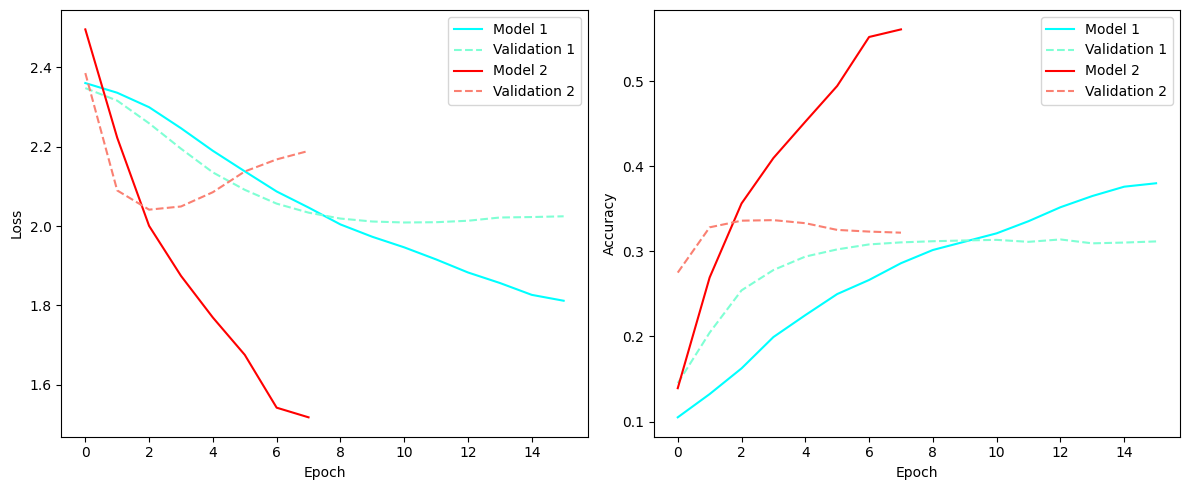

In [66]:
model1, model2 = 4, 7   # select which models you want to compare from history
plot_comparison(histories[model1], histories[model2])

#### Model 4:

In [63]:
# YOU NEED TO IMPORT TEST BEFORE (see last section)

#insert the best model
predictions = models[4].predict(x_test)

338/338 [==============================] - 1s 3ms/step


In [64]:
from sklearn.metrics import classification_report
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

         0.0       0.25      0.18      0.21      1080
         1.0       0.25      0.08      0.12      1080
         2.0       0.32      0.51      0.39      1080
         3.0       0.33      0.51      0.40      1080
         4.0       0.24      0.19      0.21      1080
         5.0       0.35      0.49      0.40      1080
         6.0       0.28      0.19      0.23      1080
         7.0       0.43      0.53      0.48      1080
         8.0       0.33      0.49      0.40      1080
         9.0       0.24      0.06      0.10      1080

    accuracy                           0.32     10800
   macro avg       0.30      0.32      0.29     10800
weighted avg       0.30      0.32      0.29     10800



In [61]:
genres = np.unique(df['genre'])

genre_mapping = {}
for i, genre in enumerate(genres):
    genre_mapping[i] = genre

genre_mapping

{0: 'action',
 1: 'adventure',
 2: 'crime',
 3: 'family',
 4: 'fantasy',
 5: 'horror',
 6: 'mystery',
 7: 'romance',
 8: 'scifi',
 9: 'thriller'}

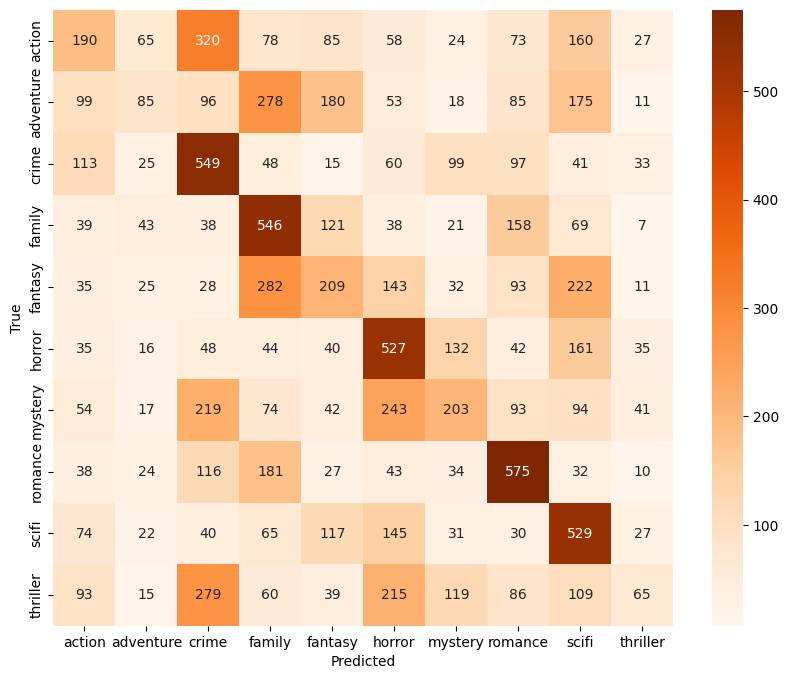

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(y_true=y_test,y_pred=predicted_labels)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf, annot=True, cmap="Oranges", fmt='g')  # fmt='g' suppresses scientific notation

# Map the numerical values to genres using the dictionary
ax.set_xticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_xticklabels()])
ax.set_yticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_yticklabels()])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [71]:
test_loss, test_acc = models[4].evaluate(x_test, y_test)
print('Test Loss %f, Test Accuracy %f' % (test_loss, test_acc))

338/338 [==============================] - 1s 4ms/step - loss: 2.0031 - accuracy: 0.3220
Test Loss 2.003131, Test Accuracy 0.322037


#### Model 7:

This is a model which overfits

In [58]:
# YOU NEED TO IMPORT TEST BEFORE (see last section)

#insert the best model
predictions = models[7].predict(x_test)

338/338 [==============================] - 2s 5ms/step


In [59]:
from sklearn.metrics import classification_report
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

         0.0       0.26      0.27      0.26      1080
         1.0       0.28      0.18      0.22      1080
         2.0       0.33      0.44      0.38      1080
         3.0       0.34      0.45      0.39      1080
         4.0       0.30      0.19      0.23      1080
         5.0       0.39      0.47      0.43      1080
         6.0       0.28      0.28      0.28      1080
         7.0       0.41      0.59      0.48      1080
         8.0       0.41      0.51      0.45      1080
         9.0       0.27      0.05      0.09      1080

    accuracy                           0.34     10800
   macro avg       0.33      0.34      0.32     10800
weighted avg       0.33      0.34      0.32     10800



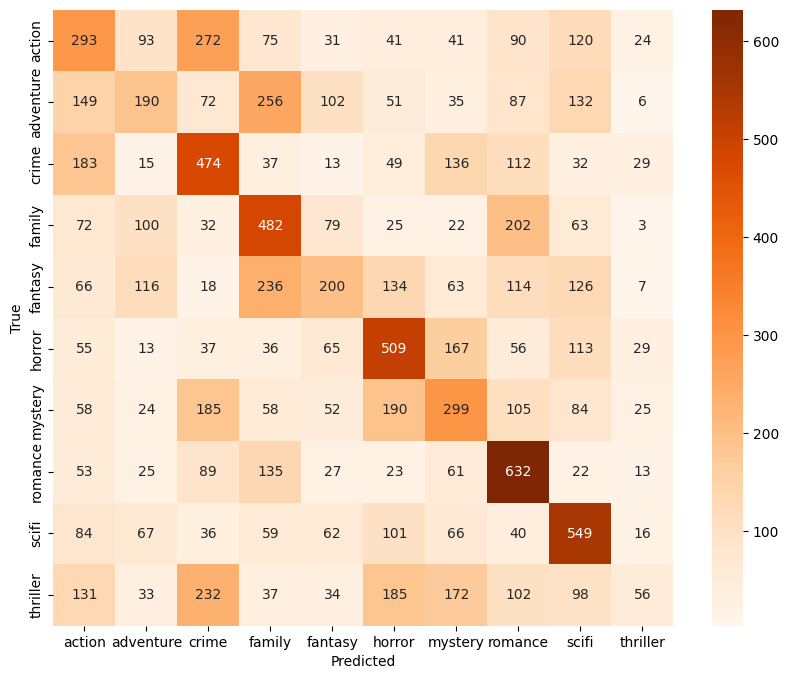

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(y_true=y_test,y_pred=predicted_labels)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf, annot=True, cmap="Oranges", fmt='g')  # fmt='g' suppresses scientific notation

# Map the numerical values to genres using the dictionary
ax.set_xticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_xticklabels()])
ax.set_yticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_yticklabels()])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [72]:
test_loss, test_acc = models[7].evaluate(x_test, y_test)
print('Test Loss %f, Test Accuracy %f' % (test_loss, test_acc))

338/338 [==============================] - 2s 5ms/step - loss: 2.0348 - accuracy: 0.3411
Test Loss 2.034831, Test Accuracy 0.341111


## Test

In [38]:
# Custom fnction
corpus_test, _ = gensim_cleaner_ALT(df_test['synopsis'], dictionary_creation=False, dictionary=dictionary)

synopsis_test = df_test['synopsis']

# using the bags of words
numpy_matrix = gensim.matutils.corpus2dense(corpus_test, num_terms = len(dictionary))
print(numpy_matrix.shape)

df_test_c2d = pd.DataFrame(numpy_matrix, index = [k for k,v in dictionary.token2id.items()], columns = synopsis_test)

df_test_nn = df_test_c2d.T

df_test_nn['label'] = list(df_test['genre'])
df_test_nn.head(2)

-------------
Number of unique tokens: 11037
Number of documents: 10800
(11037, 10800)


,brother,cleric,earl,enlists,find,learning,life,love,save,sweetheart,...,resurrects,waning,papua,taiwanese,greene,offline,yeong,perpetrated,cosmopolitan,label
synopsis,,,,,,,,,,,,,,,,,,,,,
"A children's movie about the adventures of a young sister and brother after they find a pair of magic sunglasses which are later stolen by two local bullies, and the life lessons they learn.",1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,family
"Tara is in love with Krishna, who is her college friend but he does not reciprocate her feelings. Things take a turn when Krishna falls in love with Lizy.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,romance


In [39]:
df_nn_test = df_test_nn.copy()

# Label Encoding
le = LabelEncoder()
cat_cols = ['label']

for col in cat_cols:
    df_nn_test[col] = le.fit_transform(df_nn_test[col])   # se faccio metodo dummy avrei altre 8 colonne in più. cosi rimane una

# X and y (labels) splitting
y_test = df_nn_test.values[:, -1]
df_nn_test.drop(['label'], axis=1, inplace=True)

x_test = df_nn_test.values
cols_test = df_nn_test.columns   #columns labels

print(x_test.shape)
print(y_test.shape)

(10800, 11037)
(10800,)
